# Exercises on Generalizing to higher dimensions

## Exercise 6.1
Implement a `Vec3` class inheriting from Vector

The solution has been implemented in [e00 &mdash; Vector lib](../e00-vector-lib/).

## Exercise 6.2

Implement a `CoordinateVector` class inheriting from Vector with an abstract property representing the dimension. This should save the repetitive work when implementing specific coordinate vector classes. Inheriting from CoordinateVector and setting the dimension to 6 should be sufficient to implement a `Vec6` class.

The solution has been implemented in [e00 &mdash; Vector lib](../e00-vector-lib/).

## Exercise 6.3

Add a `zero(...)` abstract method to the `Vector` class to return the zero vector in a given vector space, as well as an implementation for the negation operator. These are useful because we're required to have a zero vector and negations of any vector in any vector space.

The solution has been implemented in [e00 &mdash; Vector lib](../e00-vector-lib/).

## Exercise 6.4

Write unit tests to show that the addition and scalar multiplication operations for `Vec3` satisfy the vector space properties.

The solution has been implemented in [e00 &mdash; Vector lib](../e00-vector-lib/).

## Exercise 6.5

Add unit tests to all the test classes to validate that $ 0 + v = v $, $ 0 \cdot v = \vec{0} $, and $ -v + v = \vec{0} $.

The solution has been implemented in [e00 &mdash; Vector lib](../e00-vector-lib/).

# Exercise 6.6

As equality is implemented for `Vec2` and `Vec3`, it turns out that `Vec2(1, 2) == Vec3(1, 2, 3)` is `True`. Python's duck typying is too forgiving for its own good! Fix this by adding a check tht classes must match before testing vector equality.

The solution has been implemented in [e00 &mdash; Vector lib](../e00-vector-lib/).

## Exercise 6.7

Implement a `__truediv__` function on `Vector` that allows you to divide vectors by scalars.

> Hint: dividing a vector by an scalar is the same as multiplying for `1.0 / scalar`.

The solution has been implemented in [e00 &mdash; Vector lib](../e00-vector-lib/).

In [ ]:
## Exercise 6.8

Run the vector space unit tests with float values for $ u $, $ v $ and $ w $, rather than with objects inheriting from the `Vector` class. This demonstrates that real numbers are indeed vectors.

We already have a `vector0d.py` class that inherits from `Vector` and demonstrates it is a vector space in [e00 &mdash; Vector lib](../e00-vector-lib/). But what is asked here is to implement the tests without creating the class that inherits from `Vector`. That is, we need to validate that *floats* fulfill the following rules:

1. $ v + w = w + v $

2. $ u + (v + w) = (u + v) + w $

1. $ a (b v) = (a b) v $

2. $ 1 v = v $

3. $ a v + b v = (a + b) v $

4. $ a (v + w) = av + aw $

And as a bonus:

7. $ \vec{0} + v = v $

8. $ \vec{0} \cdot v = \vec{0} $

9. $ -v + v = \vec{0} $

For $ u $, $ v $, $ w $ being floats.

Instead of doing it with the `unittest` library, as we just want to demonstrate it for this execise, we will use `assert` instead:

In [5]:
from math import isclose
from random import uniform

def random_float():
    return uniform(-10, 10)

def random_scalar():
    return random_float()    

def check_vector_space_rules(eqFn, a, b, u, v, w):
    assert eqFn(u + v, v + u)
    assert eqFn(u + (v + w), (u + v) + w)
    assert eqFn(a * (b * v), (a * b) * v)
    assert eqFn(1 * v, v)
    assert eqFn((a + b) * v, a * v + b * v)
    assert eqFn(a * v + a * w, a * (v + w))
    
    assert eqFn(0 + v, v)
    assert eqFn(0 * v, 0)
    assert eqFn(-v + v, 0)

for _ in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_float(), random_float(), random_float()
    check_vector_space_rules(isclose, a, b, u, v, w)

print('Sucess!')

AssertionError: 

## Exercise 6.9

Run the vector space unit tests for `CarForSale` class to show its objects form a vector space if we ignore their textual attributes.

The solution has been implemented in [e00 &mdash; Vector lib: CarForSale tests](../e00-vector-lib/test_vector_car_for_sale.py).

## Exercise 6.10

Implement the class `Function(Vector)` that takes a function of one variable as an argument to its constructor and implements a `__call__` method so that you can treat it as a function.

As a result, you should be able to run: `plot([f, g, f + g, 3 * g], -10, 10)` with `f` and `g` being instances of `Function(...)`.

The solution has been implemented in [e00 &mdash; Vector lib: Vector Function](../e00-vector-lib/test_vector_function.py).

## Exercise 6.11

Testing equality of functions is difficult. Do your best to write a function to test whether two functions are equal.

As there is no way to prove that two functions are equal, we will limit the equality check to a few thousand samples in the range (-10, 10).

```python
    def approx_equal(self, v, w):
        if (not Function in v.__class__.mro()) or (not Function in w.__class__.mro()):
            raise TypeError('approx_equal requires compatible Function vectors')        
        
        num_samples = 10000
        samples = [self.random_scalar() for _ in range(0, num_samples)]
        results = [isclose(v(x), w(x)) for x in samples]
        return all(results)
```

It must be noted that the equality of functions is an *undecidable* problem. That is, it has been proved that there is no algorithm that can guarantee whether any two functions are the same.

Because of that, our function might return `True` for functions that are not equal.

You can have a look at all the details in: [e00 &mdash; Vector lib: Vector Function](../e00-vector-lib/test_vector_function.py).

## Exercise 6.12

Unit test your `Function` class to demonstrate that functions satisfy the vector space properties.

In [1]:
TBD after we define *polynomial functions*.

SyntaxError: invalid syntax (<ipython-input-1-40c4968db9b9>, line 1)

## Exercise 6.13

Implement a class `Function2(Vector)` that stores a function of two variables.

Resolved in [e00 &mdash; Vector lib: Vector Function2](../e00-vector-lib/test_vector_function2.py).

## Exercise 6.14

What is the dimension of the vector space of the $ 9 \times 9 $ matrices.

A $ 9 \times 9 $ matrix has 81 independent numbers, and therefore, it is an 81-dimensional vector space.

## Exercise 6.15

Implement a `Matrix` class inheriting from `Vector` with abstract properties representing the number of rows and columns. You should not be able to instantiate a `Matrix` class, but you should be able to inherit from `Matrix` to create a `Matrix_5_x_3`.

Resolved in [e00 &mdash; Vector lib: Matrix](../e00-vector-lib/test_vector_matrix_2x2.py).

## Exercise 6.16

There is no exercise 6.16 :)

## Exercise 6.17

Create and unit test the `Matrix_5x3` class to demonstrate that it obeys the defining properties of a vector space.

Resolved in [e00 &mdash; Vector lib: Matrix](../e00-vector-lib/test_vector_matrix_5x3.py).

## Exercise 6.18

Write a `LinearMap3d_to_5d` class inheriting from `Vector` that uses a $ 5x3 $ matrix as its data but implements a `__call__` method to act as a linear map from $ \mathbb{R}^3 $ to $ \mathbb{R}^5 $. Show that it agrees with `Matrix_5x3` in its underlying computation and that independently passes the defining properties of a vector space.

Resolved in [e00 &mdash; Vector lib: LinearMap 3D to 5D](../e00-vector-lib/test_linear_map_3d_to_5d.py).

## Exercise 6.19

Write a Python function enabling you to multiply `Matrix_5x3` objects by `Vec3` objects in the sense of matrix multiplication. Update your overloading of the `*` operator for the vector and matrix classes so that you can multiply vectors on their left by either scalars or matrices.

Resolved in [e00 &mdash; Vector lib: Matrix 5x3](../e00-vector-lib/test_matrix_5x3.py).

## Exercise 6.20

Convince yourself that the zero vector for the `ImageVector` class doesn't visibly alter any image when it is added.


Resolved in [e00 &mdash; Vector lib: Image Vector 300x300](../e00-vector-lib/test_vector_image_300x300.py).

## Exercise 6.21

Pick two images and display 10 different weighted averages of them. Note that these will be points on a line segment connecting the images in a 270,000-dimensional space!!!

In [ ]:
Let's show the begining and the end of the line:

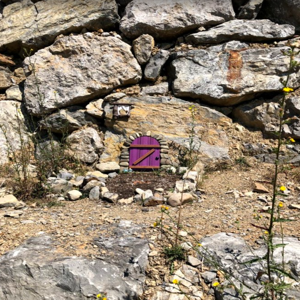

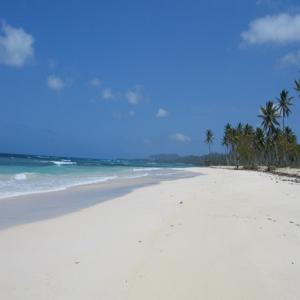

In [5]:
from vector_image_300x300 import ImageVector_300x300
from IPython.display import display

display(ImageVector_300x300('./images/001.png'))
display(ImageVector_300x300('./images/002.png'))

Now, we have to do 10-linear combinations in a loop that will give us the weighted averages, in which the first iteration should be the first image, and the last iteration should be the second image.

That can be done with the following combination:

$
(1 - s) \cdot Image-1 + s \cdot Image-2, \hspace{1ex}  s=0,\hspace{1ex} 0.1,\hspace{1ex} 0.2...1
$

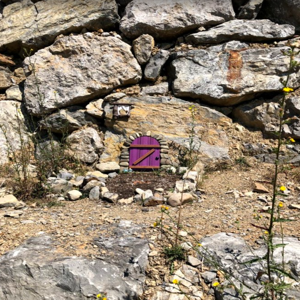

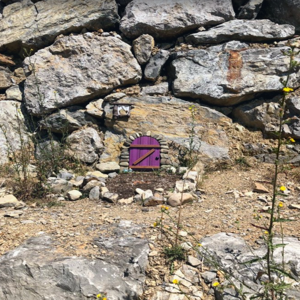

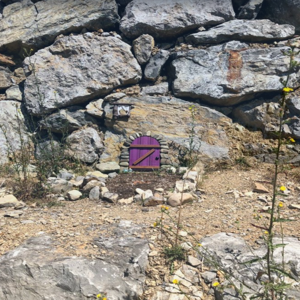

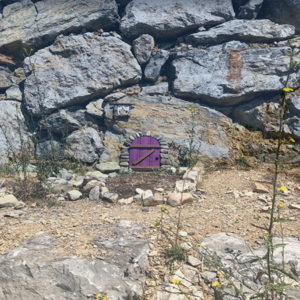

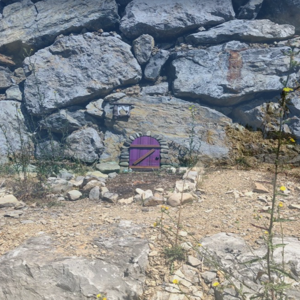

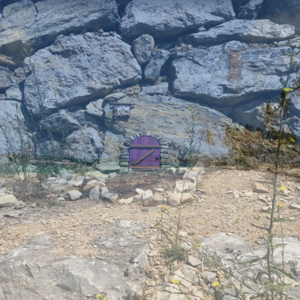

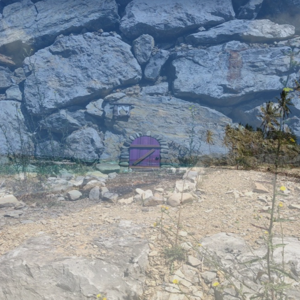

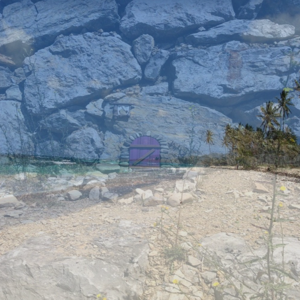

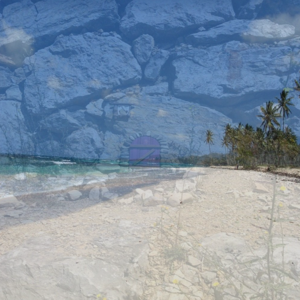

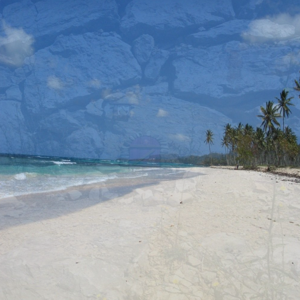

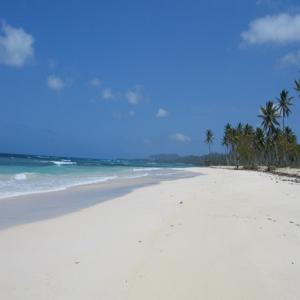

In [7]:
import numpy as np
from vector_image_300x300 import ImageVector_300x300
from IPython.display import display

img_1 = ImageVector_300x300('./images/001.png')
img_2 = ImageVector_300x300('./images/002.png')

for s in np.arange(0, 1.1, 0.1):
    linear_combo_image = (1 - s) * img_1 + s * img_2
    display(linear_combo_image)


## Exercise 6.22

Adapt the verctor space unit test to image and run them. What do your randomized unit tests look like as images?

In [ ]:
Resolved in [e00 &mdash; Vector lib: Image Vector 300x300](../e00-vector-lib/test_vector_image_300x300.py).

Random images were built this way:

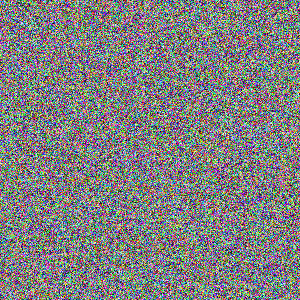

In [11]:
from random import randint
from vector_image_300x300 import ImageVector_300x300

def random_color_value():
    value = randint(0, 255)
    return value

def random_image_pixels():
    width, height = ImageVector_300x300.size()
    pixels = [(random_color_value(), random_color_value(), random_color_value()) for _ in range(0, width * height)]
    return pixels

ImageVector_300x300(random_image_pixels())

## Exercise 6.23

Give a geometric argument for why the following region $ S $ of the plane can't be a vector subspace of the plane.

![S is not a subspace](../images/s_is_not_a_subspace.png)

One of the characteristics of a subspace is that a subspace should be self-contained. That is, it should be closed under linear combinations &mdash; there should be no way to build a linear combination of vectors of the subspace that *escapes* the subspace.

In the example above we clearly see that this is not true. For example, there are a few vectors in the form `(0, y)` that are in the subspace, but only for a range of y.

Also, it doesn't include the vector zero. The vector zero is a scalar multiple of any vector, so it must be paart of any vector space or subspace.

## Exercise 6.24

Show that the region of the plane where $ x = 0 $ forms a 1D vector space.

The vectors that lie on the y axis are a vector subspace of $ \mathbb{R} $ because:
* it is a vector space
* any linear combination of vectors of the form $ (0, y) $ stay within that vector space.

The rules to check for a vector space are:

$
u + v = v + u \\
u + (v + w) = (u + v) + w \\
a (b \cdot v) = (ab) \cdot v \\
1 \cdot v = v \\
(a + b) \cdot v = a \cdot v + b \cdot v \\
a \cdot v + a \cdot w = a \cdot (v + w) \\
\vec{0} + v = v \\
0 \cdot v = \vec{0} \\
-v + v = \vec{0} \\
$

And then, we'll need to check that for any vector $ v $ and $ w $ from that subspace:

$
a \cdot v + b \cdot w = (0, y)
$

## Exercise 6.25

Show that three vectors $\{ (1, 0), \hspace{1ex} (1, 1), \hspace{1ex} (-1, 1) \} $ are linearly dependent by writing each one as a linear combination of the other two.

We know from the concept section that a set of vectors are *linearly dependent* if any of its members can be obtained as a linear combination of the others.

In our case:

$
(1, 0) = \frac{1}{2} \cdot ((1, 1) - (-1, 1)) \\
(1, 1) = 2 \cdot (1, 0) + (-1, 1) \\
(-1, 1) = -2 \cdot (1, 0) + (1, 1)
$


## Exercise 6.26

Show that you can get any vector $ (x, y) $ as a linear combination of $\{ (1, 0), \hspace{1ex} (1, 1) \} $

Clearly:

$
(x, y) = a \cdot (1, 0) + b \cdot (1, 1) = (a + b, b) \\
x = a + b, \hspace{1ex} y = b \\
a = x - y \\
b = y
$

So we have a formula so that for any $ (x, y) $ vector we know how to calculate the coordinates of such vector in the basis $\{ (1, 0), \hspace{1ex} (1, 1) \} $.

## Exercise 6.27

Given a single vector $ v $, explain why the set of all linear combinations of $ v $ is the same as the set of all scalar multiples of $ v $.

Because:

$
a \cdot v + b \cdot v = (a + b) \cdot v = s \cdot v \\
$

So that $ s = a + b $.

## Exercise 6.28

From a geometric perspective, explain why a line that doesn't pass through the origin is not a vector subspace (of the plane or of the 3d space).

Algebraically, we know that it cannot be a vector subspace because one of the rules of a vector space is $ v + \vec{0} = v $ and therefore, the vector zero should be part of the subspace.

Geometrically, a line that does not pass through the origin will have some point of the form $ (0, y) $ for some y. A scalar multiplication of that vector will render a point $ (0, sy) $ that does not lie in the line, and therefore, the subspace will be not closed, and therefore it is not a subspace.

Also, it will contain some point $ (x, 0) $ for some x. Both $ (x, 0) $ and $ (0, y) $ are linearly independent vectors and therefore, they will span the whole plane.

## Exercise 6.29

Any two of $\{ e1, \hspace{1ex} e2, \hspace{1ex} e3 \} $ will fail to span all of $ \mathbb{R^3} $ and will instead span 2D subspaces of a 3D space. What are these subspaces?

$\{ e1, \hspace{1ex} e2 \} $ will span the x, y plane.

$\{ e2, \hspace{1ex} e3 \} $ will span the y, z plane.

$\{ e1, \hspace{1ex} e3 \} $ will span the x, z plane.

## Exercise 6.30

Write the vector $ (-5, 4) $ as a linear combination $ (0, 3) $ and $ (-2, 1) $.

$
(-5, 4) = a \cdot (0, 3) + b \cdot (-2, 1) \\
-5 = -2 b \Rightarrow b = \frac{5}{2} \\
4 = 3 a + b \Rightarrow a = \frac{1}{2}
$

## Exercise 6.31

Are $\{ (1, 2, 0), \hspace{1ex} (5, 0, 5), \hspace{1ex} (2, -6, 5) \} $ linearly independent or linearly dependent vectors?

The given vectors will be linearly dependent if any of the vectors can be expressed as a linear combination of the other two.

Let's start with the first one:

$
(1, 2, 0) = a \cdot (5, 0, 5) + b \cdot (2, -6, 5) \\
1 = 5a + 2b \\
2 = -6b \\
0 = 5a + 5b \\
$

That is very easy to solve:

$
a = \frac{1}{3}, \hspace{1ex} b = -\frac{1}{3}
$

Therefore, the first vector is a linear combinatior of the other two, so it is redundant and the given vectors are linear dependent.

## Exercise 6.32

Explain why the linear function $ f(x) = ax + b $ is not a linear map from the vector space $ \mathbb{R} $ to itself unless $ b = 0 $.

We know from the concepts section that a *linear map* is a function that is linear in the sense that it preserves vector sums and scalar multiples, but that cannot be considered a linear transformation in the sense that it doesn't just modify the input: it returns an entirely different kind of output.

An example of a *linear map* is the function that projects a 3D vector into plane z = 0.

Therefore, $ f(x) = ax + b $ would be a linear map if it preserves vector sums and scalar multiples, that is:

$ P $ preserves linear combinations if given two scalars $ a $ and $ b $, and two vectors $ v $ and $ w $:

$
P(a \cdot v + b \cdot w) = P((a \cdot v_1 + b \cdot w_1, a \cdot v_2 + b \cdot w_2, a \cdot v_3 + b \cdot w_3)) \\
= (a \cdot v_1 + b \cdot w_1, a \cdot v_2 + b \cdot v_2) = a \cdot (v_1, v2) + b \cdot (w_1, w_2) \\
= a \cdot P(v) + b \cdot P(w)
$

As we need to demonstrate is not a linear map, it will be enough to find an instance where the linear combination is not preserved:

$ f $ will preserve linear combinations if:

$
f(1 + 1) = f(1) + f(1)
$

but:

$
f(2) = 2a + b \\
f(1) + f(1) = (ax + b) + (ax + b) = 2ax + 2b
$

which will be only true when $ b = 0 $.

## Exercise 6.33

Rebuild the `LinearFunction` class by inheriting from the `Vec2` class and implementing the `__call__` method.

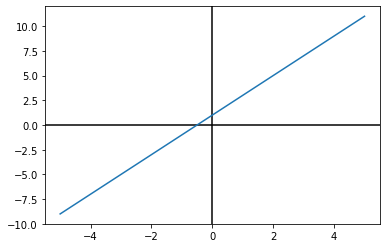

In [4]:
from vector2d import Vec2
from my_plot import plot

class LinearFunction(Vec2):
    def __call__(self, x):
        return x * self.x + self.y

    def __repr__(self):
        return 'LinearFunction(x) = {}x + {}'.format(self.x, self.y)

f = LinearFunction(2, 1)
plot([f], -5, 5)

## Exercise 6.34

Prove algebraically that the linear function $ f(x) = ax + b $ forms a vector subspace of the vector space of functions.

We know that for that function to be a vector subspace of the vector space of functions we need to demonstrate:
* it is a vector space
* any linear combination of vectors of the form $ f(x) = ax + b $ stays within that vector space.

To prove it is a vector space we need to prove:

$
u + v = v + u \\
u + (v + w) = (u + v) + w \\
a (b \cdot v) = (ab) \cdot v \\
1 \cdot v = v \\
(a + b) \cdot v = a \cdot v + b \cdot v \\
a \cdot v + a \cdot w = a \cdot (v + w) \\
\vec{0} + v = v \\
0 \cdot v = \vec{0} \\
-v + v = \vec{0} \\
$

Then, we'll need to prove that a linear combination:

$
s_1 f_1(x) + s_2 f_2(x)
$

is of the form $ ax + b $ 

The vector space rules are simple arithmetic, so I'll skip those.

The linear combination is easy too:

$
s_1 f1_1(x) + s_2 f_2(x) = s_1 (a_1 x + b_1) + s_2 (a_2 x + b_2) = \\
s_1 a_1 x + s_2 a_2 x + s_1 b_1 + s_2 b_2 = \\
(s_1 a_1 + s_2 a_2)x + (s_1 b_1 + s_2 b_2) 
$

This proves, the space of linear functions is a subspace of the space of functions $ \mathbb{R} \Rightarrow \mathbb{R} $

## Exercise 6.35

Find a basis for the set of 3x3 matrices. What is the dimension of the vector space.

The space of 3x3 matrices has 9 distinctive elements, so it has 9 dimensions and we need 9 vectors to span the vector space:

$
e_i = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}
$

where:
+ $ e_1 $ has $ a_{11} = 1 $ rest equal to zero
+ $ e_2 $ has $ a_{12} = 1 $ rest equal to zero
+ ...
+ $ e_9 $ has $ a_{33} = 1 $ rest equal to zero

## Exercise 6.36

Implement a class `QuadraticFunction(Vector)` that represents the vector subspace of functions of the form $ ax² + bx + c $. What is a basis of this subspace?

Let's start with the algebraic part. The vectors that represents *quadratic functions* are of the form: $ (a, b, c) $. Therefore, the subspace of quadratic functions have 3 dimensions, and a basis of this subspace is:

$ \{(1, 0, 0), \hspace{1ex} (0, 1, 0), \hspace{1ex}, (0, 0, 1) \} $. Any other set of linearly independent vectors would also be a valid basis. In function teerms this will look like:
$
f(x) = x² \\
g(x) = x \\
h(x) = 1
$ 

The programming related answer can be found in [e00 &mdash; Vector lib](../e00-vector-lib/vector_quadratic_function).

## Exercise 6.37

We claimed in the concepts section that $ \{4x + 1, x - 2 \} $ is a basis for the set of linear functions. Show that you can write $ -2x + 5 $ as a linear combination of these two functions.

It's easier if we write the functions as vectors:

$
4x + 1 = (4, 1) \\
x - 2 = (1, -2) \\
-2x + 5 = (-2, 5)
$

Therefore, we can set up the following equations:

$
(-2, 5) = a \cdot (4, 1) + b \cdot (1, -2)\\
-2 = 4a + b \\
5 = a - 2 b \\
$

Solving the set of equations we get:

$
a = \frac{1}{9} \\
b = -\frac{22}{9}
$

## Exercise 6.38

The vector space of all polynomials is an infinte dimensional subspace. Implement that vector space as a class and describe a basis (which must be an infinite set).

First the algebraic answer:

The vector space of polynomials are functions of the form:

$ f(x) = a_0 + a_1x + a_2x² + a_3 x³ + ... $ where $ n=0, \hspace{1ex} 1, \hspace{1ex}... \hspace{1ex}n $

Therefore the basis will be:
$
e_0 = (1, 0, 0, ... 0, ...) \\
e_1 = (0, 1, 0, ... 0, ...) \\
e_2 = (0, 0, 1, ... 0, ...) \\
...
$




The programming related answer can be found in [e00 &mdash; Vector lib](../e00-vector-lib/vector_polynomial).